Run this script to compute the Hellman-Feynman force on surface 3 and compare it to the "full force" on surface 3.
Note the Hellman-Feynman force is defined as
\begin{equation}
F_{HF} = -\langle \Phi_3 | \frac{\partial \hat{H}}{\partial R} | \Phi_3 \rangle
\end{equation}
and the full force is defined as 
\begin{equation}
F = -\frac{\partial }{\partial R}\langle \Phi_3 | \hat{H} | \Phi_3 \rangle
\end{equation}.

We find that the forces agree except near the regions of strong polaritonic coupling for LOSSY systems; they agree if cavity lifetime is infinite.

In [3]:
### Import all libraries and define various parameters here!
import numpy as np
from polaritonic import polaritonic
from numpy import linalg as LA
import math
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import rcParams

rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14

The following cell will actually compute the derivative coupling and write it to a file.  You can change the $\gamma$ parameter and the filename (via $prefix$) here!

In [19]:
ri_init = -0.66156
vi_init = 3.3375e-5
### lifetime
gamp = 0.000
gam_diss_np = gamp * 1e-3 / 27.211

### photonic mode energy in eV
omp = 2.45
### convert to a.u.
omc = omp/27.211
### coupling strength in eV
gp = 0.02
gc = gp/27.211

au_to_ps = 2.4188e-17 * 1e12

### get prefix for data file names
prefix = "gam_0.0"
### filename to write nuclear trajectory to
nuc_traj_fn = "Data/" + prefix + '_nuc_traj.txt'
### filename to wrote PES to
pes_fn = "Data/" + prefix + '_pes.txt'
### filename to write electronic/polaritonic dynamics to
ed_fn = "Data/" + prefix + '_electronic.txt'
### filename to write photonic contributions of each state to
pc_fn = "Data/" + prefix + '_photon_contribution.txt'

### hellman-Feynman file 
hf_fn = "Data/" + prefix + "_hf.txt"


options = {
        'Number_of_Photons': 1,
        'Complex_Frequency': True,
        'Photon_Energys': [omc],
        'Coupling_Strengths': [gc], 
        'Photon_Lifetimes': [gam_diss_np],
        'Initial_Position': ri_init,
        'Initial_Velocity': vi_init,
        'Mass': 1009883,
        ### temperature in a.u.
        'Temperature': 0.00095,
        ### friction in a.u.
        'Friction': 0.000011,
        ### specify initial state as a human would, not a computer...
        ### i.e. 1 is the ground state... it will be shifted down by -1 so
        ### that it makes sense to the python index convention
        'Initial_Local_State': 3
        
        }

### instantiate
polt = polaritonic(options)
### write Hellman-Feynman forces
polt.Write_Forces(hf_fn)
### write potential energy surfaces
polt.Write_PES(pes_fn, pc_fn)

1

### Read Hellman-Feynman forces directly and read PES data directly

In [20]:
def dfdx(x, fx):
    fp = np.zeros_like(fx)
    dx = x[1]-x[0]
    fp[0] = (fx[1]-fx[0])/dx
    fp[len(x)-1] = (fx[len(x)-1] - fx[len(x)-2])/dx
    for i in range(1,len(x)-1):
        dy = fx[i+1]-fx[i-1]
        fp[i] = dy/(2*dx)
    return fp
        

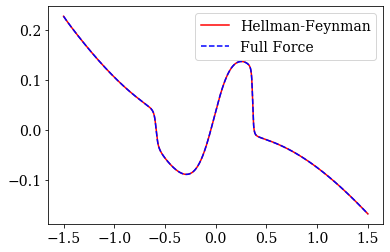

In [22]:

### read text fie
hf_data = np.loadtxt(hf_fn,dtype=complex)
pes_data = np.loadtxt(pes_fn, dtype=complex)

### get negative derivative of surface 3
force = -1*dfdx(pes_data[:,0], pes_data[:,3])


### plot Hellman-Feynman force against full force on surface 3
plt.plot(hf_data[:,0], np.real(hf_data[:,2]), 'red', label='Hellman-Feynman')
plt.plot(pes_data[:,0], np.real(force), 'b--', label='Full Force')

plt.legend()
plt.show()
